# **CIFAR-10**

In [1]:
# Import tensorflow and sklearn libraries for preprocessing,training and evaluating the model

import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPool2D, Dropout 
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get the Data from tensorflow datasets where is available
from tensorflow.keras.datasets import cifar10

In [3]:
# Lets get the data which is already splitted into train and test

(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [4]:
# Lets create the class_name variable where we will be storing actual names since the data is already encoded we need to follow the order

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
# Let get the shape of our dataset

X_train.shape # We have 50000 images for training

(50000, 32, 32, 3)

In [6]:
# Test set size

X_test.shape  # We have 10000 for classification

(10000, 32, 32, 3)

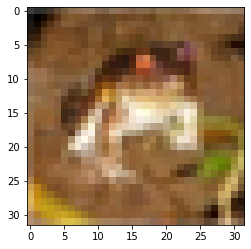

Label =  frog


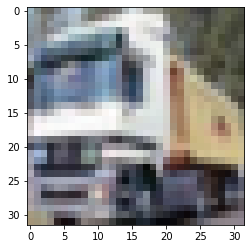

Label =  truck


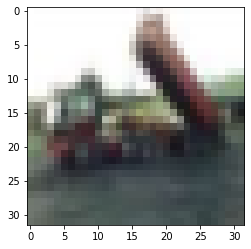

Label =  truck


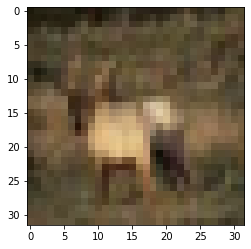

Label =  deer


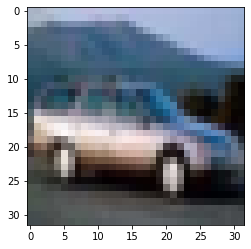

Label =  automobile


In [7]:
# Lets have a look at first five images

for i in range(5):
  plt.imshow(X_train[i])
  plt.show()
  print("Label = ",class_names[y_train[i][0]])

# **Image PreProcessing**

In [8]:
print("X_train.max() = ",X_train.max())
print("X_test.max() = ",X_test.max())

X_train.max() =  255
X_test.max() =  255


We can see that the training set and test set has max value of 255 which we will be reducing to get the values between 0 and 1

In [9]:
# Image Preprocessing
X_train = X_train/255
X_test = X_test/255

In [10]:
NUM_OF_EPOCHS = 50 # As provided to train the models for 50 epochs we have initialised it
BATCH_SIZE = 32 # Default batch size

# **Model Initialisation**

# **NetA**
The first neural network will be the simplest, in that it has no hidden layers. It should take the image
and flatten it to a vector for the input, and then have 10 outputs, one for each class.

In [11]:
def NetA():
  model = Sequential() # Initialisation of the model
  model.add(Flatten(input_shape=[32,32,3]))
  model.add(Dense(units=10,activation="softmax"))
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NUM_OF_EPOCHS,validation_data=(X_test,y_test))

  return model,history

# **NetB**
The second neural network will be slightly more complicated in that it has a hidden layer with 300
nodes and adds a non-linearity between the layers. It should use the following operations in this
order:

1. Flatten the image to a vector for the input

2. Use a fully-connected linear layer with 300 hidden-neurons

3. Use the ReLU activation function

4. Use a fully-connected linear layer to the 10 outputs.

In [12]:
def NetB():
  model = Sequential()
  model.add(Flatten(input_shape=[32,32,3]))
  model.add(Dense(units=300,activation="relu"))
  model.add(Dense(units=10,activation="softmax"))
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NUM_OF_EPOCHS,validation_data=(X_test,y_test))

  return model,history

# **NetC**
This third neural network will be a convolutional neural network. It should use the following
operations in this order:

1. Use a convolution layer with kernel-width 5 and depth 25

2. Use the ReLU activation function

3. Use a max-pool operation with kernel-width 2 and stride 2

4. Flatten the image to a vector for the next step's input

5. Use a fully-connected linear layer to the 10 outputs.

In [13]:
def NetC():
  model = Sequential()

  model.add(Conv2D(filters=25,padding="same",kernel_size=5, activation='relu' ,input_shape=[32,32,3]))
  model.add(MaxPool2D(pool_size=2, strides=2))
  model.add(Flatten())
  model.add(Dense(units=10,activation="softmax"))

  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NUM_OF_EPOCHS,validation_data=(X_test,y_test))

  return model,history

# **Model Evaluation**

Epoch 1/50
1563/1563 [==============================] - 7s 3ms/step - loss: 1.9834 - accuracy: 0.3128 - val_loss: 1.9481 - val_accuracy: 0.3203
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8970 - accuracy: 0.3510 - val_loss: 1.8088 - val_accuracy: 0.3684
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8789 - accuracy: 0.3598 - val_loss: 1.8847 - val_accuracy: 0.3586
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8577 - accuracy: 0.3672 - val_loss: 1.8266 - val_accuracy: 0.3573
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8444 - accuracy: 0.3715 - val_loss: 1.8124 - val_accuracy: 0.3731
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8410 - accuracy: 0.3743 - val_loss: 1.8419 - val_accuracy: 0.3685
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8348 - accuracy: 0.3768 - val_loss: 1.8352 - val_accuracy:

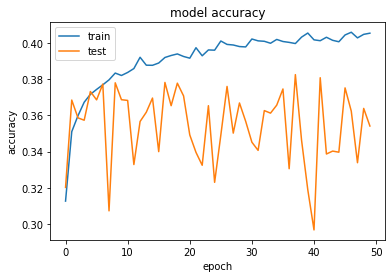

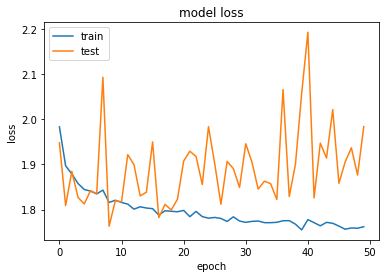

In [13]:
modelA,hist = NetA()
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In the first model **modelA** which just the Flatten layer.

1. **Accuracy** : We can see that the train accuracy and test accuracy in not as good to deploy the model.

2. **Loss** :We can also see that the training loss is decreasing but the validation loss is increasing rather than decreasing.

***Model is Ok but the accuracy is not good enough***

In [31]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = modelA.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Confusion Matrix : \n", confusion_matrix(y_true = y_test,y_pred = y_pred_classes))

print("\n\nClassification Report:\n", classification_report(y_test, y_pred_classes))

Confusion Matrix : 
 [[562 100   0   0  70  19  36 152  45  16]
 [ 74 613   1   3  45  25  59 111  21  48]
 [121  64   7   4 258  77 218 234  11   6]
 [ 40 103   0  31 164 200 265 176  11  10]
 [ 57  35   2   2 359  60 243 229   9   4]
 [ 42  74   1  17 161 287 163 230  19   6]
 [ 18  53   0   4 142  53 607 116   4   3]
 [ 48  63   1   3 122  54  60 624   9  16]
 [303 215   0   0  39  49  33  88 255  18]
 [117 369   0   4  48  21  75 148  22 196]]


Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.56      0.47      1000
           1       0.36      0.61      0.46      1000
           2       0.58      0.01      0.01      1000
           3       0.46      0.03      0.06      1000
           4       0.25      0.36      0.30      1000
           5       0.34      0.29      0.31      1000
           6       0.35      0.61      0.44      1000
           7       0.30      0.62      0.40      1000
           8       0.63      0.26  

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8818 - accuracy: 0.3302 - val_loss: 1.7514 - val_accuracy: 0.3737
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7035 - accuracy: 0.3875 - val_loss: 1.6791 - val_accuracy: 0.3973
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6482 - accuracy: 0.4114 - val_loss: 1.6448 - val_accuracy: 0.4139
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6050 - accuracy: 0.4283 - val_loss: 1.6474 - val_accuracy: 0.4063
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5822 - accuracy: 0.4369 - val_loss: 1.5861 - val_accuracy: 0.4348
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5552 - accuracy: 0.4447 - val_loss: 1.5885 - val_accuracy: 0.4319
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5362 - accuracy: 0.4515 - val_loss: 1.5395 - val_accuracy:

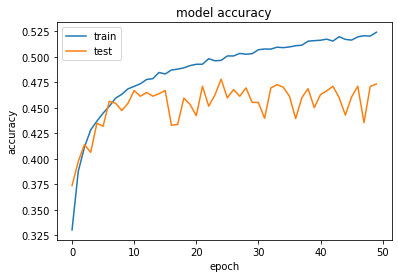

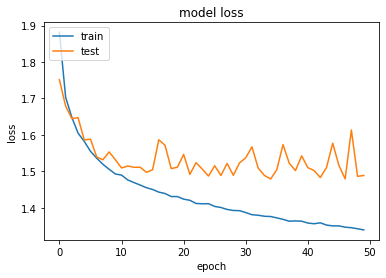

In [26]:
modelB,hist = NetB()
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
y_pred = modelB.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Confusion Matrix : \n", confusion_matrix(y_true = y_test,y_pred = y_pred_classes))

print("\n\nClassification Report:\n", classification_report(y_test, y_pred_classes))

Confusion Matrix : 
 [[491  44 109  29  19   9  23  59 164  53]
 [ 42 592  38  28  14   7  24  43  58 154]
 [ 61  20 428  84  76  62 119 106  20  24]
 [ 20  14 123 311  50 153 166 112  19  32]
 [ 37   8 230  54 303  39 136 158  28   7]
 [ 10  16 141 198  48 316  97 136  22  16]
 [  7  11 109 111  75  38 568  53  14  14]
 [ 29  17  96  55  51  56  30 619  12  35]
 [105  80  38  30  11  12  12  36 620  56]
 [ 33 188  32  39   8  16  31 105  62 486]]


Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.49      0.54      1000
           1       0.60      0.59      0.59      1000
           2       0.32      0.43      0.37      1000
           3       0.33      0.31      0.32      1000
           4       0.46      0.30      0.37      1000
           5       0.45      0.32      0.37      1000
           6       0.47      0.57      0.51      1000
           7       0.43      0.62      0.51      1000
           8       0.61      0.62  

In the first model **modelB** which just the Flatten layer.

1. **Accuracy** : We can see that the train accuracy and test accuracy in not as good to deploy the model but better than modelA.

2. **Loss** :We can also see that the training loss is decreasing but the validation loss is neither increasing nor decreasing.

***Model is Ok but the accuracy is not good enough***

Epoch 1/50
1563/1563 [==============================] - 33s 3ms/step - loss: 1.4982 - accuracy: 0.4699 - val_loss: 1.3031 - val_accuracy: 0.5325
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2164 - accuracy: 0.5756 - val_loss: 1.2068 - val_accuracy: 0.5722
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1020 - accuracy: 0.6188 - val_loss: 1.1233 - val_accuracy: 0.6058
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0280 - accuracy: 0.6456 - val_loss: 1.0914 - val_accuracy: 0.6209
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9822 - accuracy: 0.6610 - val_loss: 1.1161 - val_accuracy: 0.6115
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9396 - accuracy: 0.6768 - val_loss: 1.0851 - val_accuracy: 0.6242
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9071 - accuracy: 0.6873 - val_loss: 1.1042 - val_accuracy

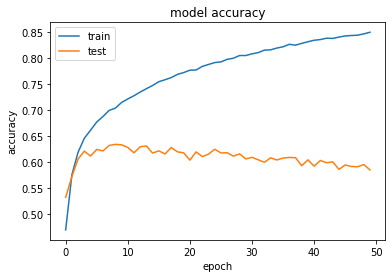

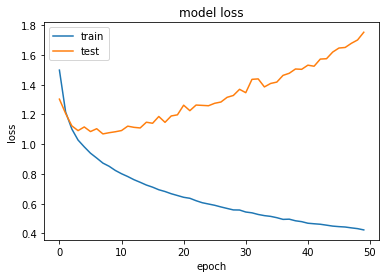

In [28]:
modelC,hist = NetC()
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
y_pred = modelC.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Confusion Matrix : \n", confusion_matrix(y_true = y_test,y_pred = y_pred_classes))

print("\n\nClassification Report:\n", classification_report(y_test, y_pred_classes))

Confusion Matrix : 
 [[569  21 107  46  25  20   7  11 134  60]
 [ 41 658  21  31   5   8   6   1  59 170]
 [ 60   6 516 117  61  97  61  41  26  15]
 [ 14  10 110 513  45 178  62  32  12  24]
 [ 28   2 154 134 439  66  82  75  14   6]
 [ 12   3 116 255  31 495  22  42  14  10]
 [  7  10  88 147  39  49 629  12   7  12]
 [ 23   9  76 105  51 118  12 581   7  18]
 [ 71  43  24  30   5  15   8   1 754  49]
 [ 46  97  16  33   4  23   5  25  56 695]]


Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.57      0.61      1000
           1       0.77      0.66      0.71      1000
           2       0.42      0.52      0.46      1000
           3       0.36      0.51      0.43      1000
           4       0.62      0.44      0.51      1000
           5       0.46      0.49      0.48      1000
           6       0.70      0.63      0.66      1000
           7       0.71      0.58      0.64      1000
           8       0.70      0.75  

In the first model **modelC** which just the Flatten layer.

1. **Accuracy** : We can see that the train accuracy is good enough but test accuracy is too low and decreasing as the epochs increases.

2. **Loss** :We can also see that the training loss has reduced to 0.4 but the validation loss is increasing rather than decreasing.

***Model is Overfitting since the training set is providing the accuracy of 84% and test set of 58%***